### Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

### Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Data Analysis

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

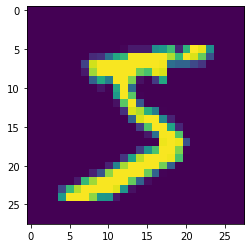

In [6]:
plt.imshow(X_train[0])

### Data Pre-Processing

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Create model

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

### Train the model

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 206s 109ms/step - loss: 0.2121 - accuracy: 0.9519 - val_loss: 0.0907 - val_accuracy: 0.9711
Epoch 2/5
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0677 - accuracy: 0.9793 - val_loss: 0.0816 - val_accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 175s 94ms/step - loss: 0.0476 - accuracy: 0.9848 - val_loss: 0.0935 - val_accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 175s 93ms/step - loss: 0.0390 - accuracy: 0.9872 - val_loss: 0.0899 - val_accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 175s 94ms/step - loss: 0.0280 - accuracy: 0.9911 - val_loss: 0.1027 - val_accuracy: 0.9777


### Test the model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10273492336273193, 0.9776999950408936]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 102ms/step
[[1.53746391e-10 1.75428175e-18 1.17442236e-10 2.18056250e-11
  7.73577125e-17 5.06554137e-19 1.94794653e-20 9.99999762e-01
  2.56741544e-07 2.39526649e-12]
 [6.21215371e-11 1.39942863e-10 1.00000000e+00 1.93216622e-15
  2.72396876e-16 1.47305084e-17 1.25156233e-10 6.93939204e-22
  1.22176561e-10 6.17768880e-18]
 [8.40967462e-10 9.99997139e-01 2.35593620e-06 5.86598695e-13
  5.23263566e-09 5.16847565e-10 4.52401405e-09 1.29384725e-09
  4.67130434e-07 1.25064655e-11]
 [1.00000000e+00 2.88726833e-14 1.46077265e-11 8.35156055e-14
  2.52699786e-16 1.79248679e-13 7.40295958e-09 8.48165091e-15
  1.26283411e-11 3.44290143e-08]]


In [15]:
import numpy
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Save the model

In [16]:
model.save("model.h5")

### Test the saved model

In [17]:
model=load_model("model.h5")

In [19]:
img = Image.open("2.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

1/1 [==============================] - 0s 67ms/step
0    2
Name: Label, dtype: int64


## CONFUSION MATRIX

In [20]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
mnist = fetch_openml("mnist_784")

In [21]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)
mdl = LogisticRegression(solver='lbfgs')
mdl.fit(X_train, y_train)
predictions = mdl.predict(X_test)
score = mdl.score(X_test, y_test)
print(score)

0.9185


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


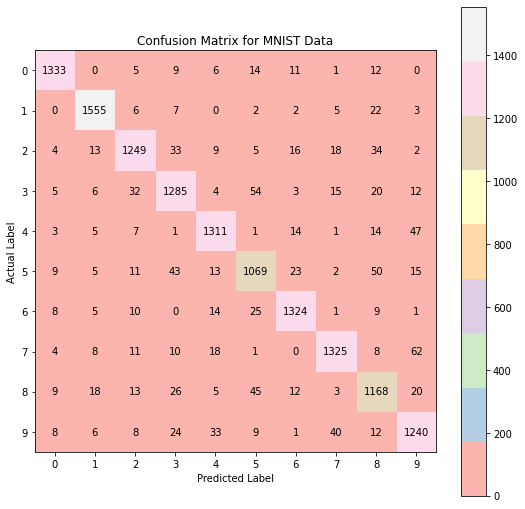

In [22]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
plt.imshow(cm, cmap='Pastel1')
plt.title('Confusion Matrix for MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center')